# Get Top Companies From Fortune

## Abstract
Abstract
We are creating a database about Fortune top 100 companies and stocks related to some of the companies in the world. Then some of the attributes will be merged into a table. There are three data source: row csv data, using beautiful soup and using api. We will perform several data operation like data auditing, finding missing values, checking and visualizing. Finally, we build a conceptual model in the form of an Entity-Relationship Diagram.

## Data

price  
mktCap  
companyName  
ceo  
sector  
revenues  
profits  
assets  
market_value  
employees  

## DATASOURCE 1 - Using API

#### What is an API:
API stands for Application Programming Interface, and it lets developers integrate any two parts of an application or any different applications together. It consists of various elements such as functions, protocols, and tools that allow developers to build applications. A common goal of all types of APIs is to accelerate the development of applications by providing a part of its functionality out-of-the-box, so developers do not have to implement it themselves.

### Importing libaries

In [1]:
import requests
import pandas as pd
import json
import os

### Downloading companies' stock data through API

Visit this lik to see the datasets that we are going to work with: https://financialmodelingprep.com/most-searched-stocks

In [2]:
js = []
data = []

# get the companies url
list = [
        "https://financialmodelingprep.com/api/v3/company/profile/MSFT",
        "https://financialmodelingprep.com/api/v3/company/profile/AAPL",
        "https://financialmodelingprep.com/api/v3/company/profile/FB",
        "https://financialmodelingprep.com/api/v3/company/profile/NVDA",
        "https://financialmodelingprep.com/api/v3/company/profile/ZNGA",
        "https://financialmodelingprep.com/api/v3/company/profile/AMZN",
        "https://financialmodelingprep.com/api/v3/company/profile/NKE",
       ]

### Keeping the data in one json file

In [3]:
for num in range(0,7):
    js.append(requests.get(list[num]).json())
    
for i in range(0,7):
    data.append(js[i]['profile'])

### Printing one company's information as an example

In [4]:
data[0]    

{'price': 170.23,
 'beta': '1.231028',
 'volAvg': '22427004',
 'mktCap': '1.29477784E12',
 'lastDiv': '1.84',
 'range': '102.77-174.05',
 'changes': -2.55,
 'changesPercentage': '(-1.48%)',
 'companyName': 'Microsoft Corporation',
 'exchange': 'Nasdaq Global Select',
 'industry': 'Application Software',
 'website': 'http://www.microsoft.com',
 'description': 'Microsoft Corp is a technology company. It develop, license, and support a wide range of software products and services. Its business is organized into three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing.',
 'ceo': 'Satya Nadella',
 'sector': 'Technology',
 'image': 'https://financialmodelingprep.com/images-New-jpg/MSFT.jpg'}

### Cleaning and auditing the data in topMovies

In [5]:
# Only selected fields are required, and set them in the certain order
selectedColumns = ['price', 'beta', 'volAvg', 'mktCap', \
                   'lastDiv', 'range', 'changes', 'changesPercentage','companyName' ]
compDataFrame = pd.DataFrame(data, columns = selectedColumns)
compDataFrame.describe()

,price,changes
count,7.000000,7.000000
mean,432.731429,14.597143
std,701.772996,54.659312
min,6.020000,-14.360000
25%,133.265000,-8.500000
50%,201.910000,-2.550000
75%,272.970000,-0.975000
max,2008.720000,138.040000


### How to find missing values

In [6]:
# checking missing, NaN data in the dataframe through API
compDataFrame.isnull().any()

price                False
beta                 False
volAvg               False
mktCap               False
lastDiv              False
range                False
changes              False
changesPercentage    False
companyName          False
dtype: bool

### Checking shape of the data

In [7]:
compDataFrame.shape

(7, 9)

### Checking the columns present in the database

In [8]:
compDataFrame.columns

Index(['price', 'beta', 'volAvg', 'mktCap', 'lastDiv', 'range', 'changes',
       'changesPercentage', 'companyName'],
      dtype='object')

### Checking that attribute id is unique or not

In [9]:
compDataFrame['companyName'].is_unique

True

### Checking the information of the data - data type and total number of records in each column

In [10]:
compDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              7 non-null      float64
 1   beta               7 non-null      object 
 2   volAvg             7 non-null      object 
 3   mktCap             7 non-null      object 
 4   lastDiv            7 non-null      object 
 5   range              7 non-null      object 
 6   changes            7 non-null      float64
 7   changesPercentage  7 non-null      object 
 8   companyName        7 non-null      object 
dtypes: float64(2), object(7)
memory usage: 632.0+ bytes


## Technique to use visualization to understand the data better

Here we are using seaborn, matplotlib and scipy to analyse our dataset

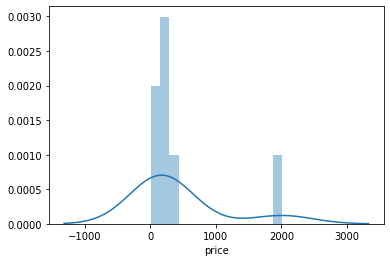

In [11]:
# Importing liabries used for visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Random Example to illustrate the working of the Visualization using random values

# Random function used to plot the random values
x = compDataFrame['price']
sns.distplot(x);

### We use the volAvg from our data frame to illustarte how the vote count is distributed in the data set

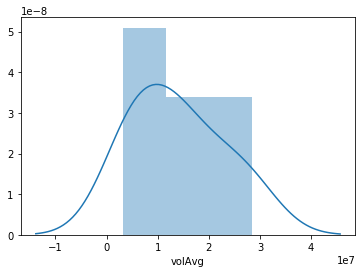

In [12]:
y = compDataFrame['volAvg']
sns.distplot(y);

In [13]:
# Printing y
y

0    22427004
1    28544181
2    14100598
3     8076465
4    14586385
5     3313468
6     5838713
Name: volAvg, dtype: object

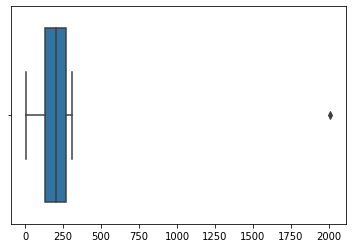

In [14]:
sns.boxplot(np.array(compDataFrame['price']))

### Printing all companies' stock information in the database

In [15]:
compDataFrame

,price,beta,volAvg,mktCap,lastDiv,range,changes,changesPercentage,companyName
0,170.23,1.231028,22427004,1.29477784E12,1.84,102.77-174.05,-2.55,(-1.48%),Microsoft Corporation
1,309.51,1.228499,28544181,1.35425478E12,2.92,167.28-327.85,-14.36,(-4.43%),Apple Inc.
2,201.91,1.062394,14100598,5.7579681E11,0,159.28-224.2,-7.62,(-3.64%),Facebook Inc.
3,236.43,2.037942,8076465,1.44695149E11,0.64,132.6-259.5,-9.38,(-3.82%),NVIDIA Corporation
4,6.02,0.290893,14586385,5.6944502E9,0,4.33-6.92,-0.06,(-0.99%),Zynga Inc.
5,2008.72,1.516863,3313468,9.959173E11,0,1566.76-2055.72,138.04,(+7.38%),Amazon.com Inc.
6,96.30,0.825463,5838713,1.49974729E11,0.88,77.07-105.62,-1.89,(-1.92%),Nike Inc.


### Saving best stocks to csv file

In [16]:

# Prepare the file we will write into
current_dir = os.getcwd()
if not os.path.exists(os.path.join(current_dir, 'data')):
    os.makedirs(os.path.join(current_dir,'data'))
    
with open(os.path.join('data','data.json'), 'w+') as outFile:
    json.dump(data, outFile)
    
compDataFrame.to_csv(os.path.join('data','data.csv'), encoding = 'utf-8', index=False)

### Printing all movies in the database

In [17]:
compDataFrame

,price,beta,volAvg,mktCap,lastDiv,range,changes,changesPercentage,companyName
0,170.23,1.231028,22427004,1.29477784E12,1.84,102.77-174.05,-2.55,(-1.48%),Microsoft Corporation
1,309.51,1.228499,28544181,1.35425478E12,2.92,167.28-327.85,-14.36,(-4.43%),Apple Inc.
2,201.91,1.062394,14100598,5.7579681E11,0,159.28-224.2,-7.62,(-3.64%),Facebook Inc.
3,236.43,2.037942,8076465,1.44695149E11,0.64,132.6-259.5,-9.38,(-3.82%),NVIDIA Corporation
4,6.02,0.290893,14586385,5.6944502E9,0,4.33-6.92,-0.06,(-0.99%),Zynga Inc.
5,2008.72,1.516863,3313468,9.959173E11,0,1566.76-2055.72,138.04,(+7.38%),Amazon.com Inc.
6,96.30,0.825463,5838713,1.49974729E11,0.88,77.07-105.62,-1.89,(-1.92%),Nike Inc.


In [18]:
compDataFrame.to_csv("data.csv",encoding="utf-8",index=False)

## DATASOURCE 2 - Using Beautiful Soup

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

### Importing Libraries for web scraping

In [19]:
import requests
from bs4 import BeautifulSoup

The site we are going to use is https://fortune.com/fortune500/2019/search/please visit the link to get information on what is being scrapped

### Printing the information fetched from the website as a readable format

<!DOCTYPE html>
<!-- saved from url=(0043)https://fortune.com/fortune500/2019/search/ -->
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script src="./Fortune500_01_files/osd.js">
  </script>
  <script src="./Fortune500_01_files/pubads_impl_rendering_2020011602.js">
  </script>
  <script src="./Fortune500_01_files/jquery.color-2.1.2.min.js">
  </script>
  <script async="" src="./Fortune500_01_files/bxl.js" type="text/javascript">
  </script>
  <script async="" src="./Fortune500_01_files/wrap.js">
  </script>
  <script async="" src="./Fortune500_01_files/wrap(1).js">
  </script>
  <script async="" src="./Fortune500_01_files/config.js" type="text/javascript">
  </script>
  <script id="piano-id" src="./Fortune500_01_files/tinypass.min.js" type="text/javascript">
  </script>
  <script async="" src="./Fortune500_01_files/prebid-analytics-2.44.1.js" type="text/javascript">
  </script>
  <script src="./Fortune500_01_files/gallery.js">
  </sc
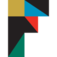
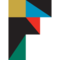
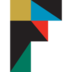
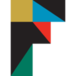
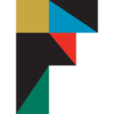
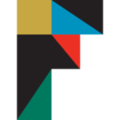
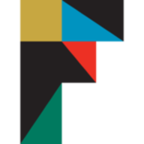
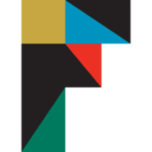
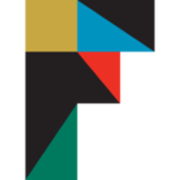
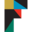
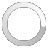

In [20]:
#save the website as html file in computer, then fetch the tags from the html file
main_page = BeautifulSoup(open("/Users/xunuo/Desktop/Fortune500_01.html"), "html.parser")
#make the format readable by using prettify()
print(main_page.prettify())

### By using div tags to get the companies ranking information

In [21]:
#find all the information about companies from table 
div1 = main_page.find('div',attrs={'class':'rt-tbody'})
rows = div1.find_all('div',attrs={'class':'rt-tr-group'})
print(rows)

[<div class="rt-tr-group" role="rowgroup"><div class="rt-tr -odd" role="row"><div class="rt-td searchResults__cell--2Y7Ce searchResults__rank--1sTfo" role="gridcell" style="flex: 100 0 auto; width: 100px;"><a class="searchResults__cellWrapper--39MAj" href="https://fortune.com/fortune500/2019/walmart/"><div class="searchResults__cellContent--3WEWj"><span>1</span></div></a></div><div class="rt-td searchResults__cell--2Y7Ce searchResults__title--3LyRA" role="gridcell" style="flex: 100 0 auto; width: 100px;"><a class="searchResults__cellWrapper--39MAj" href="https://fortune.com/fortune500/2019/walmart/"><div class="searchResults__cellContent--3WEWj"><span><div>Walmart</div></span></div></a></div><div class="rt-td searchResults__cell--2Y7Ce" role="gridcell" style="flex: 100 0 auto; width: 100px;"><a class="searchResults__cellWrapper--39MAj" href="https://fortune.com/fortune500/2019/walmart/"><div class="searchResults__cellContent--3WEWj"><span>$514,405.0</span></div></a></div><div class="rt

### Writing all companies information into a csv file separately and printing them in console

In [22]:
# open a csv file
f = open("overall.csv",mode="a")

# Get each company's information separately
for row in rows:
    
    # Get all the collons' information of each row
    cols = row.find_all('div',attrs={'class':'searchResults__cellContent--3WEWj'})
    
    # write the information into a csv file
    for col in cols:
        span= col.find("span")
        f.write(span.text)
        f.write(",")
        print(span.text)
    f.write('\n')
    print()

1
Walmart
$514,405.0
2.8%
$6,670.0
-32.4%
$219,295.0
$279,880.3
-
2,200,000
-

2
Exxon Mobil
$290,212.0
18.8%
$20,840.0
5.7%
$346,196.0
$342,172.0
-
71,000
-

3
Apple
$265,595.0
15.9%
$59,531.0
23.1%
$365,725.0
$895,667.4
1
132,000
1

4
Berkshire Hathaway
$247,837.0
2.4%
$4,021.0
-91.1%
$707,794.0
$493,870.3
-1
389,000
-1

5
Amazon.com
$232,887.0
30.9%
$10,073.0
232.1%
$162,648.0
$874,709.5
3
647,500
3

6
UnitedHealth Group
$226,247.0
12.5%
$11,986.0
13.5%
$152,221.0
$237,255.5
-1
300,000
-1

7
McKesson
$208,357.0
4.9%
$67.0
-98.7%
$60,381.0
$22,455.1
-1
68,000
-1

8
CVS Health
$194,579.0
5.3%
$-594.0
-109.0%
$196,456.0
$69,951.6
-1
295,000
-1

9
AT&T
$170,756.0
6.4%
$19,370.0
-34.2%
$531,864.0
$228,444.7
-
268,220
-

10
AmerisourceBergen
$167,939.6
9.7%
$1,658.4
355.0%
$37,669.8
$16,785.9
2
20,500
2

11
Chevron
$166,339.0
23.6%
$14,824.0
61.2%
$253,863.0
$234,049.7
2
48,600
2

12
Ford Motor
$160,338.0
2.3%
$3,677.0
-51.6%
$256,540.0
$35,028.0
-1
199,000
-1

13
General Motors
$147,049.

## DATASOURCE 3 - Using Raw Data

We download Fortune 500 data from this website https://www.someka.net/excel-template/fortune-500-excel-list/ .
It is an Excel format file, then I transform it to csv file.
By using padans, we get all top 500 companies information and print the top 100.

### importing libary

In [23]:
import pandas as pd

### Displaying the output

In [24]:
# read csv file
data2 = pd.read_csv('Fortune500.csv')
# show the top100 information
print(data2.head(100))

    Rank           Company Name  Number of Employees Change in \nRank  \
0      1                Walmart              2200000                -   
1      2            Exxon Mobil                71000                -   
2      3                  Apple               132000                1   
3      4     Berkshire Hathaway               389000               -1   
4      5             Amazon.com               647500                3   
..   ...                    ...                  ...              ...   
95    96                 AbbVie                30000               14   
96    97                    CHS                10495               -1   
97    98  Capital One Financial                47600                3   
98    99            Progressive                37346               13   
99   100              Coca-Cola                62600              -13   

    Revenues\n($millions) Revenue \nChange  Profits\n($millions)  \
0                514405.0            0.028             

### How to find missing values

In [25]:
# checking missing, NaN data in the data source
data2.isnull().any()

Rank                                 False
Company Name                         False
Number of Employees                  False
Change in \nRank                     False
Revenues\n($millions)                False
Revenue \nChange                     False
Profits\n($millions)                 False
Profit \nChange                      False
Assets\n($millions)                  False
Market Value \nAs of 3/29/19 ($m)    False
dtype: bool

### Checking shape of the data

In [26]:
data2.shape

(500, 10)

### Checking the entities present in the database

In [27]:
data2.columns

Index(['Rank', 'Company Name', 'Number of Employees', 'Change in \nRank',
       'Revenues\n($millions)', 'Revenue \nChange', 'Profits\n($millions)',
       'Profit \nChange', 'Assets\n($millions)',
       'Market Value \nAs of 3/29/19 ($m)'],
      dtype='object')

### Checking the information of the data - data type and total number of records in each column

In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Rank                              500 non-null    int64  
 1   Company Name                      500 non-null    object 
 2   Number of Employees               500 non-null    int64  
 3   Change in 
Rank                   500 non-null    object 
 4   Revenues
($millions)              500 non-null    float64
 5   Revenue 
Change                   500 non-null    object 
 6   Profits
($millions)               500 non-null    float64
 7   Profit 
Change                    500 non-null    object 
 8   Assets
($millions)                500 non-null    float64
 9   Market Value 
As of 3/29/19 ($m)  500 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 39.2+ KB


## Technique to use visualization to understand the data better

Here we are using seaborn, matplotlib and scipy to analyse our dataset

In [29]:
# Importing liabries used for visualization

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

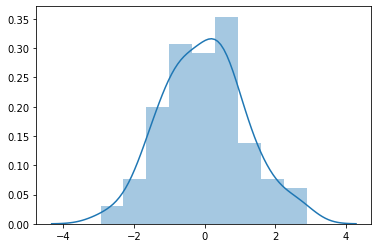

In [30]:
# Random function used to plot the random values
x = np.random.normal(size=100)
sns.distplot(x);

## CONCEPTUAL MODEL

### Generating Tables by reformatting data

In [31]:
# Fetched all the rows and first five columns using slicing
mktCap = compDataFrame.iloc[:,:5]
mktCap

,price,beta,volAvg,mktCap,lastDiv
0,170.23,1.231028,22427004,1.29477784E12,1.84
1,309.51,1.228499,28544181,1.35425478E12,2.92
2,201.91,1.062394,14100598,5.7579681E11,0
3,236.43,2.037942,8076465,1.44695149E11,0.64
4,6.02,0.290893,14586385,5.6944502E9,0
5,2008.72,1.516863,3313468,9.959173E11,0
6,96.30,0.825463,5838713,1.49974729E11,0.88


In [32]:
# Created a table lastDiv using the below columns
lastDiv = compDataFrame.loc[:,['companyName','mktCap','lastDiv']]
lastDiv

,companyName,mktCap,lastDiv
0,Microsoft Corporation,1.29477784E12,1.84
1,Apple Inc.,1.35425478E12,2.92
2,Facebook Inc.,5.7579681E11,0
3,NVIDIA Corporation,1.44695149E11,0.64
4,Zynga Inc.,5.6944502E9,0
5,Amazon.com Inc.,9.959173E11,0
6,Nike Inc.,1.49974729E11,0.88


In [33]:
# Created a table ceo using the below columns
ceo = compDataFrame.loc[:,['companyName','price','range']]
ceo

,companyName,price,range
0,Microsoft Corporation,170.23,102.77-174.05
1,Apple Inc.,309.51,167.28-327.85
2,Facebook Inc.,201.91,159.28-224.2
3,NVIDIA Corporation,236.43,132.6-259.5
4,Zynga Inc.,6.02,4.33-6.92
5,Amazon.com Inc.,2008.72,1566.76-2055.72
6,Nike Inc.,96.30,77.07-105.62


### Generating CSV files (Exporting the files to the PC)

In [34]:
mktCap.to_csv("mkt.csv",encoding="utf-8",index=False)

In [35]:
MKTCap = pd.read_csv("mkt.csv")

In [36]:
MKTCap.head()

,price,beta,volAvg,mktCap,lastDiv
0,170.23,1.231028,22427004,1.294778e+12,1.84
1,309.51,1.228499,28544181,1.354255e+12,2.92
2,201.91,1.062394,14100598,5.757968e+11,0.00
3,236.43,2.037942,8076465,1.446951e+11,0.64
4,6.02,0.290893,14586385,5.694450e+09,0.00


In [37]:
lastDiv.to_csv("lastDiv.csv",encoding="utf-8",index=False)
lastDiv = pd.read_csv("lastDiv.csv")
lastDiv.head()

,companyName,mktCap,lastDiv
0,Microsoft Corporation,1.294778e+12,1.84
1,Apple Inc.,1.354255e+12,2.92
2,Facebook Inc.,5.757968e+11,0.00
3,NVIDIA Corporation,1.446951e+11,0.64
4,Zynga Inc.,5.694450e+09,0.00


In [38]:
ceo.to_csv("CEO.csv",encoding="utf-8",index=False)
ceo = pd.read_csv("CEO.csv")
ceo.head()

,companyName,price,range
0,Microsoft Corporation,170.23,102.77-174.05
1,Apple Inc.,309.51,167.28-327.85
2,Facebook Inc.,201.91,159.28-224.2
3,NVIDIA Corporation,236.43,132.6-259.5
4,Zynga Inc.,6.02,4.33-6.92


In [39]:
compByPrice = ['companyName','price']
compByPrice = pd.DataFrame(data, columns = compByPrice)
compByPrice

,companyName,price
0,Microsoft Corporation,170.23
1,Apple Inc.,309.51
2,Facebook Inc.,201.91
3,NVIDIA Corporation,236.43
4,Zynga Inc.,6.02
5,Amazon.com Inc.,2008.72
6,Nike Inc.,96.30


In [40]:
compByDesc = ['companyName','website','sector']
compByDesc = pd.DataFrame(data, columns = compByDesc)
compByDesc

,companyName,website,sector
0,Microsoft Corporation,http://www.microsoft.com,Technology
1,Apple Inc.,http://www.apple.com,Technology
2,Facebook Inc.,http://www.facebook.com,Technology
3,NVIDIA Corporation,http://www.nvidia.com,Technology
4,Zynga Inc.,http://www.zynga.com,Technology
5,Amazon.com Inc.,http://www.amazon.com,Technology
6,Nike Inc.,http://www.nike.com,Consumer Cyclical


### Combining the two datasets over a common key(companyName) and the data remains consistent

In [41]:
compDataCombined = pd.merge(compByPrice,compByDesc,left_on='companyName',right_on='companyName')                            
compDataCombined

,companyName,price,website,sector
0,Microsoft Corporation,170.23,http://www.microsoft.com,Technology
1,Apple Inc.,309.51,http://www.apple.com,Technology
2,Facebook Inc.,201.91,http://www.facebook.com,Technology
3,NVIDIA Corporation,236.43,http://www.nvidia.com,Technology
4,Zynga Inc.,6.02,http://www.zynga.com,Technology
5,Amazon.com Inc.,2008.72,http://www.amazon.com,Technology
6,Nike Inc.,96.30,http://www.nike.com,Consumer Cyclical


### ER MODEL

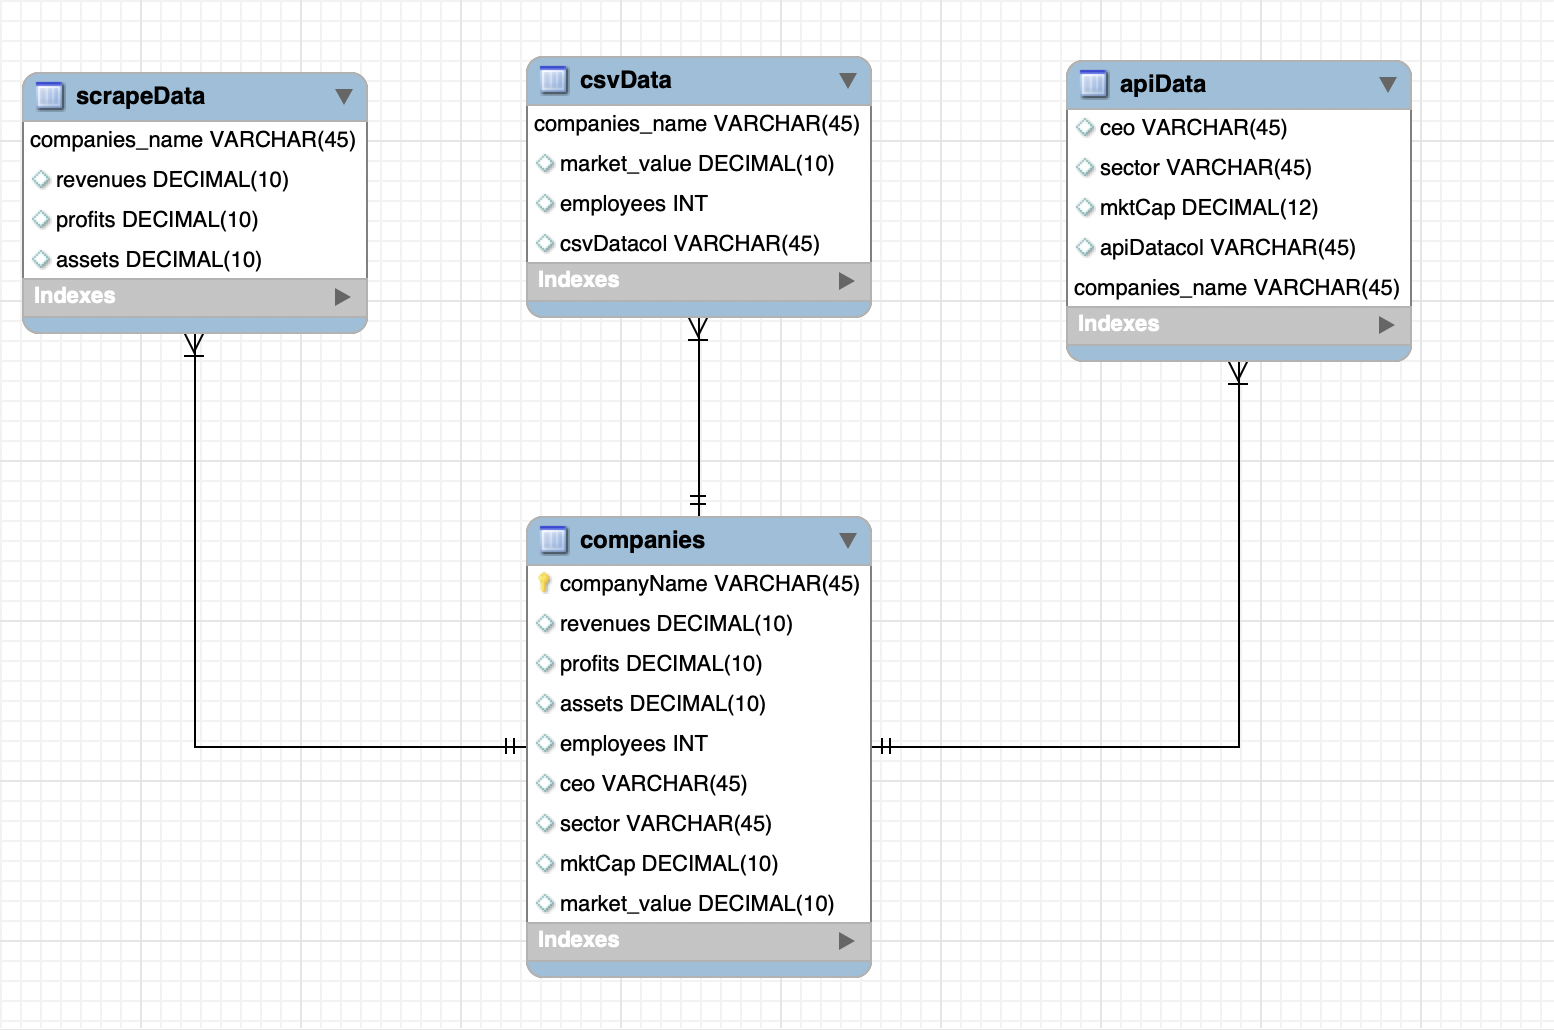

In [42]:
from IPython.display import Image
Image("ER_model.png")

The above figure shows us an entity-relationship model of three different tables from the following: data from scrapeData title table,data from cvs table, data from apiData table. We can infer that companies_name acts as a primary key, meaning that all the tables are linked with companies_name. Hence, we can conclude that on merging the three tables we obtain one table which defines a combined data set of values from different places yet relatable, which is known as a conceptual database schema.

### AUDIT VALIDITY/ACCURACY
The definition of data accuracy is whether the data values stored for an object are the correct values. To be correct, a data values must be the right value and must be represented in a consistent and unambiguous form.

### AUDIT COMPLETNESS
In real world, when a list of stock information of companies is requested, a list of particular information will be provided. Also, we can compare different information of different companies and calculate the difference between them. Then we can compare the percentage and similar data of that.

### AUDIT CONSISTENCY/UNIFORMITY
The dataset in this assignment display a uniform relationship between all the dataset since they are lined one by one through some attributes

### REPORT
fies used : data.csv, Fortune500_01.html
files genearted: data.csv, Fotun100.csv,Fortune500.csv
Code used:
Step 1. Extraction of Data
3 main methods were used for the extraction of data:
Using the API:
From the public api, i found the api provided by some producer and got 
pandas to create data frames from the raw data
Using the website to scrap the data
Here the data was extracted using the sites data directly using the libraries like:
request to access the website using the URL (https://fortune.com/fortune500/2019/search/)
BeautifulSoup to scrape the contents of the website
find() and find_all() methods were used to find the desired content in the system
By loading the csv file:
Download the data information from the Internet related to financial information of some companies
Code used for Merge


### CONCLUSION  
From this project, I understand how to get data source from the Internet, including three ways. 

First, using beautifulsoup to scrape website. By analyzing tags, we can extract the information that we need. And I have to say Beautifulsoup is a very convient tool, for it very easy to use. Second, using API to get the data. I believe that find a suitable website is important. At the beginning, we try to find Fortune's API, but it dosen't privode it. So we spend a very long time to search suitable data source. Finally, we decide use companies' stock data as the API source. Through the url the website provided, we get the data successfully. Third, we download the row data of the Fortune 500 companies from the Internet. 

Also, we learn how to visualize the data that we get from the website to make it easier to understand,by using seaborn, matplotlib and scipy. From the graphs we make, others can have a Intuitive understanding of what we doing and what is the result. 

Finally, by using SQL workbanch, we made the E-R model to show the relations between each data source. From the model, we can see what data we have and what type it is. 


### CONTRIBUTION
I contributed By Own: 50%    

By External source: 50% 

### CITATIONS

https://fortune.com/fortune500/2019/search/please 
https://www.someka.net/excel-template/fortune-500-excel-list/
https://financialmodelingprep.com/api/v3/company/profile/MSFT
https://financialmodelingprep.com/api/v3/company/profile/AAPL
https://financialmodelingprep.com/api/v3/company/profile/FB
https://financialmodelingprep.com/api/v3/company/profile/NVDA       https://financialmodelingprep.com/api/v3/company/profile/ZNGA
https://financialmodelingprep.com/api/v3/company/profile/AMZN
https://financialmodelingprep.com/api/v3/company/profile/NKE


### LICENSE
Copyright 2020 Ruizhi Ma，Nuo Xu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NON INFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.